## Resolution function demonstration

Using Ho2Ti2O7 as an example. 

In [ ]:
!pip install -q git+https://github.com/bmaranville/pyMACS.git requests

In [ ]:
import requests
def get_demo_cif(name: str):
  result = requests.get(f"https://bmaranville.github.io/pyMACS/_static/{name}")
  with open(name, 'wb') as output:
    output.write(result.content)

In [1]:
#More complex example of pyMACS usage

from pyMACS.virtualMACS import VirtualMACS
import pyMACS

get_demo_cif('HTO.cif')

macs_instr = VirtualMACS('HTO_test',cifName='HTO.cif',useOld=True)
macs_instr.sample.formula_weight=432.7
macs_instr.sample.orient_u = [1,1,0]
macs_instr.sample.orient_v = [0,0,1]
macs_instr.sample.project_sample_realspace()

1

This function pulls from a tabulated list of pre-calculated ellipsoids. I cannot guarantee the accuracy, if something seems strangely broad it likely means that the covariance matrix was not generated correctly.


 Qx, Qz, for hkl = [-0.87948, 0.0]
Covariance matrix in lab system:
[[ 0.00106006 -0.00058764  0.00430066]
 [-0.00058764  0.00163485 -0.00077156]
 [ 0.00430066 -0.00077156  0.03246623]]

Resolution matrix in lab system:
[[2901.93397622  871.43672721 -363.69709695]
 [ 871.43672721  880.3024156   -94.51506611]
 [-363.69709695  -94.51506611   76.73248463]]

Transformation into (Qpara, Qperp, E) system:
[[-6.123234e-17 -1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

Mean (Q, E) vector in (Qpara, Qperp, Qup, E) system:
[-6.63091133e-17  1.08291000e+00  1.00000000e+00]

Covariance matrix in (Qpara, Qperp, E) system:
[[ 0.00163485 -0.00058764  0.00077156]
 [-0.00058764  0.00106006 -0.00430066]
 [ 0.00077156 -0.00430066  0.03246623]]

Resolution matrix in (Qpara, Qperp, E) system:
[[ 880.3024156   871.43672721   94.51506611]
 [ 871.43672721 2901.93397622  363.69709695]
 [  94.51506611  363.69709695   76.73248463]]

3d re

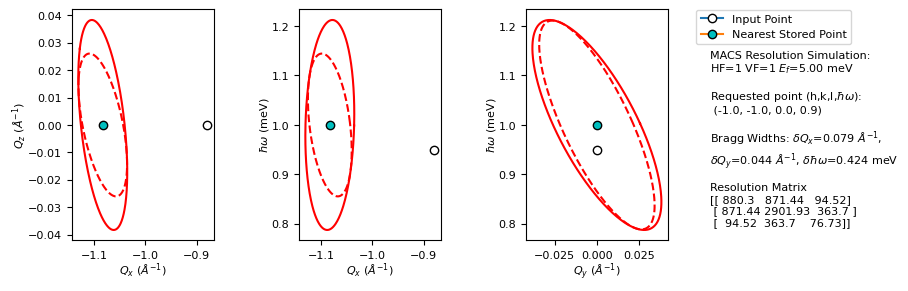

In [4]:
macs_Ef = 5.0
h = -1.0
k = -1.0
l = 0.0
E = 1.0 #energy transfer, i.e. Ei=6 meV
M,M_fwhms,Q_hkw = pyMACS.scripting.macs_resfunc(h,k,l,E,macs_Ef,macs_instr,gen_plot=True,verbose=True,calc_mode='load_cov')